In [5]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('sample_real_estate_data.csv')
print(df.dtypes)

id                 int64
Unnamed: 0         int64
price              int64
floors             int64
waterfront         int64
lat              float64
bedrooms           int64
sqft_basement      int64
view               int64
bathrooms          int64
sqft_living15      int64
sqft_above         int64
grade              int64
sqft_living        int64
dtype: object


In [6]:
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)
print(df.describe())

               price      floors  waterfront         lat    bedrooms  \
count     100.000000  100.000000  100.000000  100.000000  100.000000   
mean   549500.000000    1.800000    0.500000   48.006200    3.400000   
std     29011.491976    0.752101    0.502519    0.290115    1.024941   
min    500000.000000    1.000000    0.000000   47.511200    2.000000   
25%    524750.000000    1.000000    0.000000   47.758700    3.000000   
50%    549500.000000    2.000000    0.500000   48.006200    3.000000   
75%    574250.000000    2.000000    1.000000   48.253700    4.000000   
max    599000.000000    3.000000    1.000000   48.501200    5.000000   

       sqft_basement        view   bathrooms  sqft_living15  sqft_above  \
count      100.00000  100.000000  100.000000      100.00000   100.00000   
mean       995.00000    2.000000    1.800000     1990.00000  1990.00000   
std        290.11492    1.421338    0.752101      580.22984   580.22984   
min        500.00000    0.000000    1.000000     10

In [7]:
floors_count = df['floors'].value_counts().to_frame()
print(floors_count)

        count
floors       
1          40
2          40
3          20


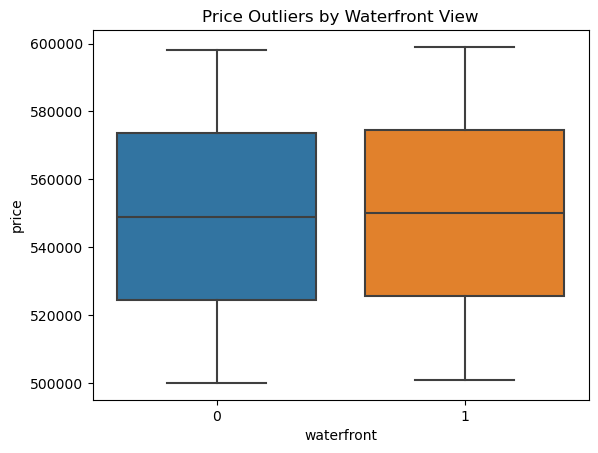

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Price Outliers by Waterfront View')
plt.show()

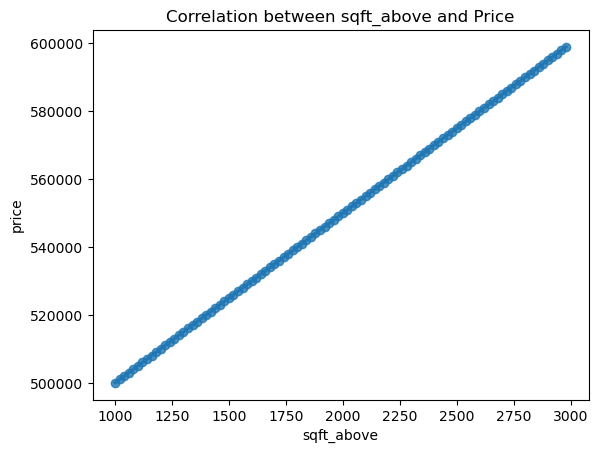

In [9]:
sns.regplot(x='sqft_above', y='price', data=df)
plt.title('Correlation between sqft_above and Price')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df[['sqft_living']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f'R^2: {r2}')

R^2: 1.0


In [11]:
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f'R^2: {r2}')

R^2: 1.0


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f'R^2: {r2}')

R^2: 1.0


In [13]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f'R^2: {r2}')

R^2: 1.0


In [14]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

ridge_poly_model = Ridge(alpha=0.1)
ridge_poly_model.fit(X_train_poly, y_train)

y_pred = ridge_poly_model.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)

print(f'R^2: {r2}')

R^2: 1.0
